![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


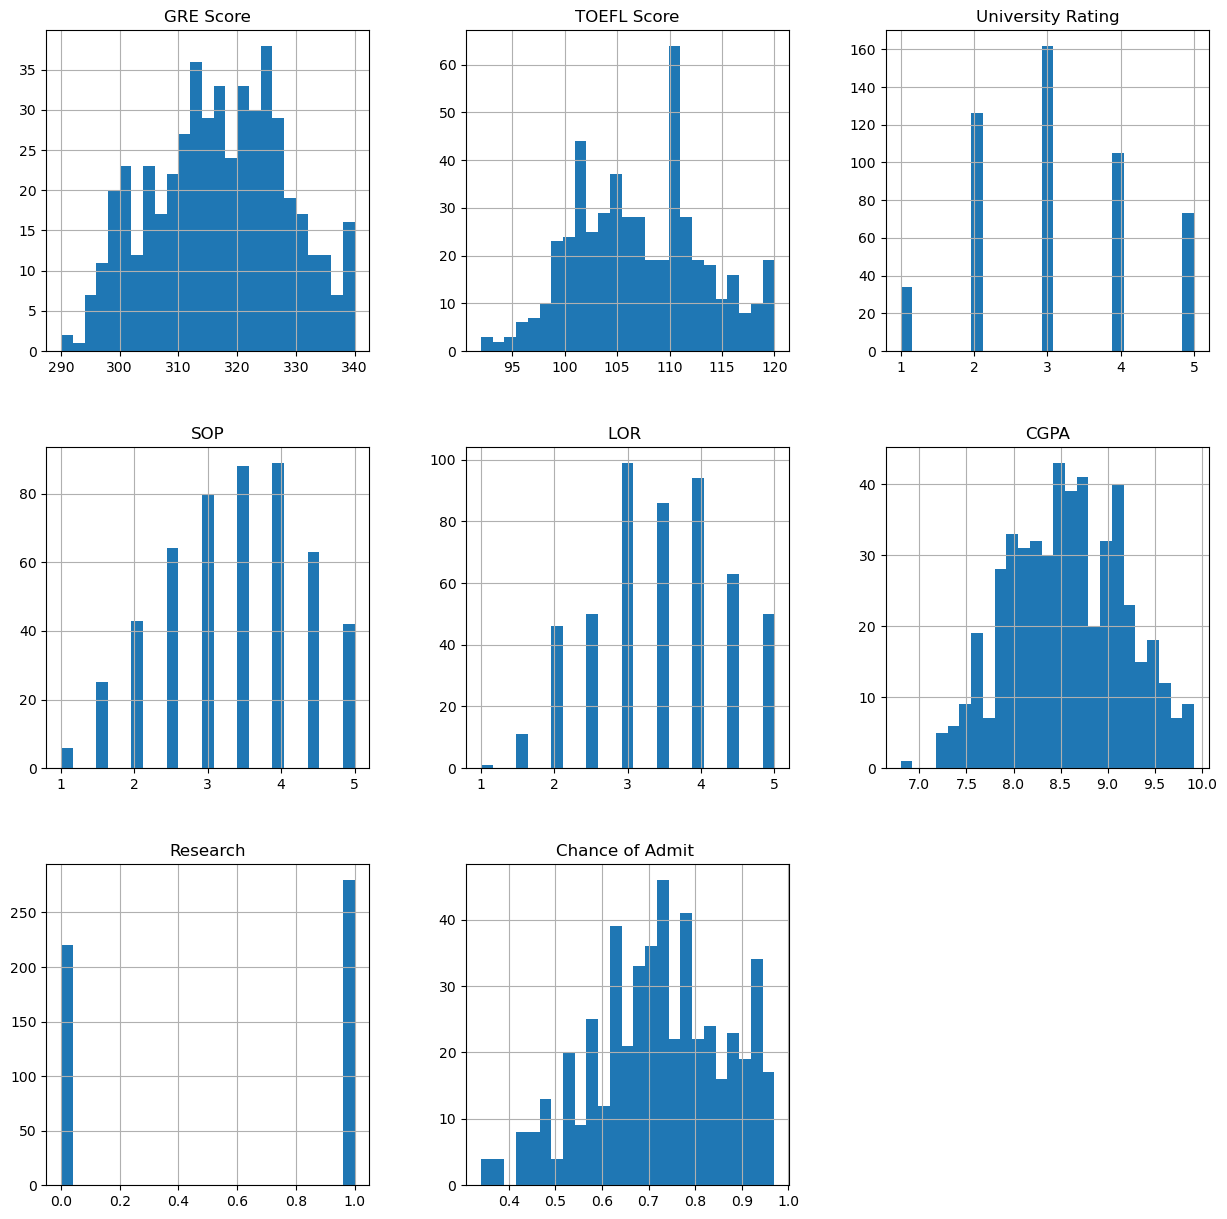

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(xTrain.shape[1],)))
model.compile(optimizer='sgd', loss='mean_squared_error')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


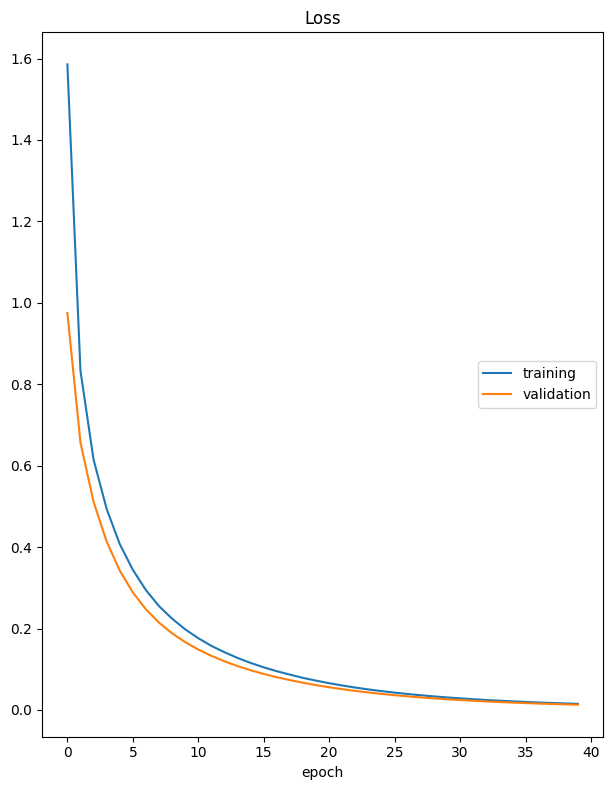

Loss
	training         	 (min:    0.015, max:    1.586, cur:    0.015)
	validation       	 (min:    0.013, max:    0.975, cur:    0.013)
11/11 [==============================] - 1s 53ms/step - loss: 0.0150 - val_loss: 0.0129


In [ ]:
model.fit(xTrain, yTrain,
          verbose=1,
          epochs=40,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

La perdida de entrenamiento es de 0,0150 y la perdida por validación es de 0,0129.  Se da una solucio´n en aproximadamente en la epoca 35

In [ ]:
y_pred=model.predict(xTest)
mse_model_1= mean_squared_error(yTest, y_pred)
mae_model_1= mean_absolute_error(yTest, y_pred)
print(f"MSE: {mse_model_1}, MAE: {mae_model_1}")

5/5 [==============================] - 0s 4ms/step
MSE: 0.012871175338752237, MAE: 0.08652733120123544


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2
K.clear_session()

model_2 = Sequential()
model_2.add(Dense(256, input_shape=(xTrain.shape[1],),activation='relu'))
model_2.add(Dense(1))
model_2.add(Activation('relu'))
model_2.compile(optimizer='sgd', loss='mean_squared_error')
print(model_2.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


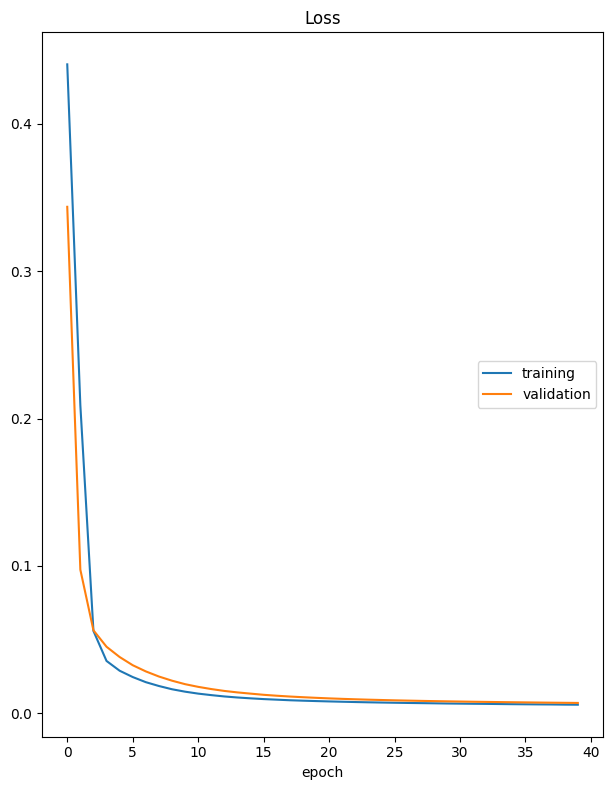

Loss
	training         	 (min:    0.006, max:    0.440, cur:    0.006)
	validation       	 (min:    0.007, max:    0.344, cur:    0.007)
11/11 [==============================] - 1s 84ms/step - loss: 0.0058 - val_loss: 0.0070


In [ ]:
model_2.fit(xTrain, yTrain,
          verbose=1,
          epochs=40,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

El modelo se estabilizo más o menos en la epoca 20. Se tiene una perdida de entrenamiento de 0,0058 y una perdida de validación de 0,0070

In [ ]:
y_pred_2=model_2.predict(xTest)
mse_model_2= mean_squared_error(yTest, y_pred_2)
mae_model_2= mean_absolute_error(yTest, y_pred_2)
print(f"MSE: {mse_model_2}, MAE: {mae_model_2}")

5/5 [==============================] - 1s 8ms/step
MSE: 0.007032333901597368, MAE: 0.0660539844751358


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 3
K.clear_session()

model_3 = Sequential()

model_3.add(Dense(256, input_shape=(xTrain.shape[1],),activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(1))
model_3.add(Activation('relu'))
model_3.compile(optimizer='sgd', loss='mean_squared_error')

print(model_3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68097 (266.00 KB)
Trainable params: 68097 

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
fBestModel = 'best_model.keras'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

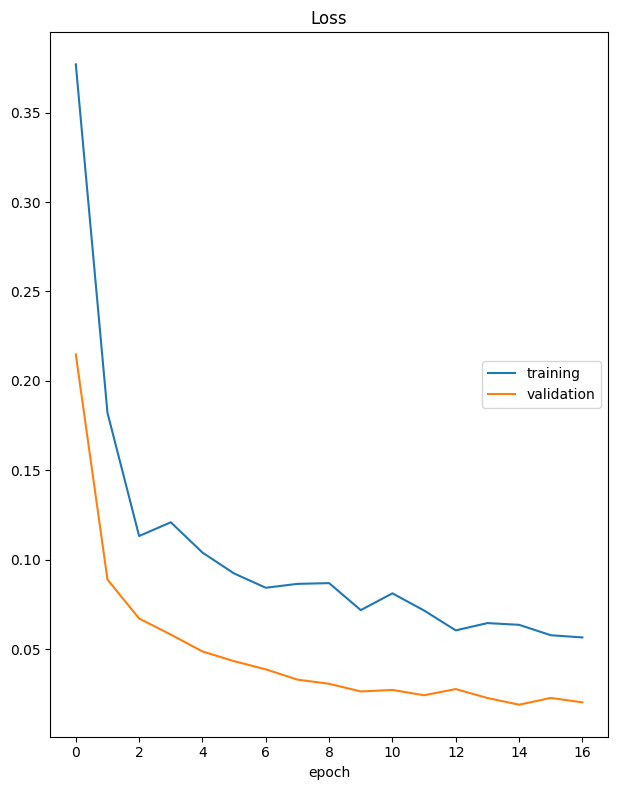

Loss
	training         	 (min:    0.056, max:    0.377, cur:    0.056)
	validation       	 (min:    0.019, max:    0.215, cur:    0.020)
11/11 [==============================] - 0s 49ms/step - loss: 0.0565 - val_loss: 0.0202
Epoch 17: early stopping


In [ ]:
model_3.fit(xTrain, yTrain,
          verbose=True,
          epochs=50,
          validation_data=(xTest, yTest),
          callbacks=[best_model, early_stop,PlotLossesKeras()])

El modelo se detuvo en la epoca 17 por que no mejora la pérdida de validación en dos epocas consecutivas.
La pérdida por entrenamiento fue de 0,0565 y la perdida por validación fue de 0.0202

In [ ]:
y_pred_3=model_3.predict(xTest)
mse_model_3= mean_squared_error(yTest, y_pred_3)
mae_model_3= mean_absolute_error(yTest, y_pred_3)
print(f"MSE: {mse_model_3}, MAE: {mae_model_3}")

5/5 [==============================] - 0s 4ms/step
MSE: 0.020193403887301276, MAE: 0.12087238818009695


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

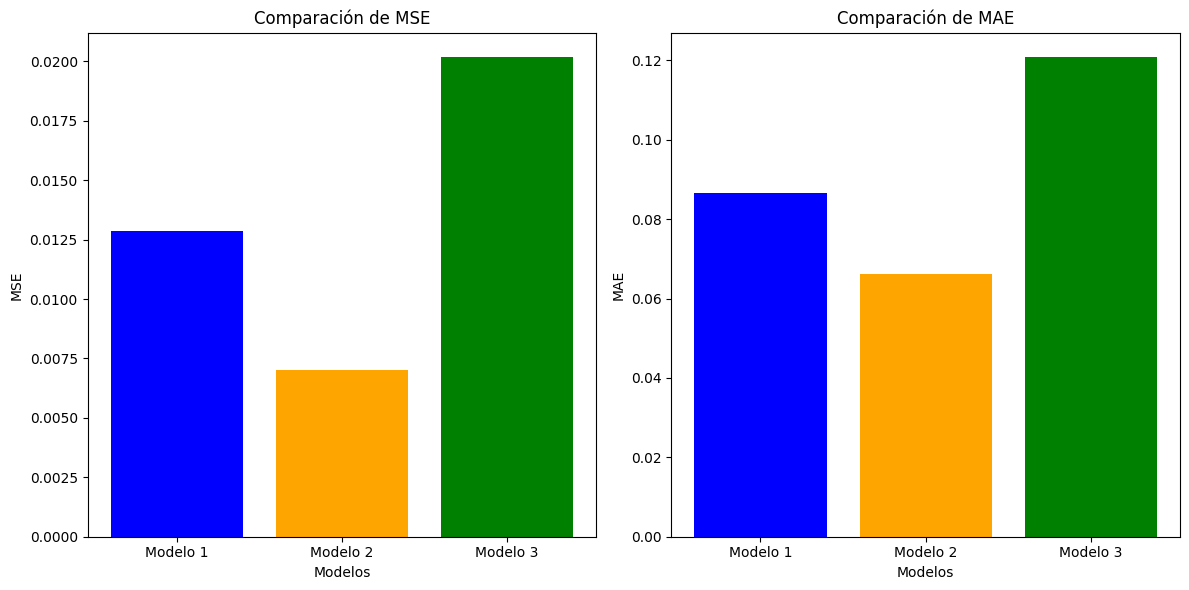

In [ ]:
# Celda 4
import matplotlib.pyplot as plt

# Comparar métricas MSE y MAE
models = ['Modelo 1', 'Modelo 2', 'Modelo 3']
mse_values = [mse_model_1, mse_model_2, mse_model_3]
mae_values = [mae_model_1, mae_model_2, mae_model_3]

plt.figure(figsize=(12, 6))

# Gráfico de MSE
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.title('Comparación de MSE')
plt.xlabel('Modelos')
plt.ylabel('MSE')

# Gráfico de MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['blue', 'orange', 'green'])
plt.title('Comparación de MAE')
plt.xlabel('Modelos')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


El modelo tres (3) a pesar de usar Dropout y Early Stopping es el que presenta peor desempeño en terminos de precisión dado que tiene el mayor MSE y MAE. Adicionalmente, es el más complejo.  Sin embargo, es importante aclarar que se controla el sobreajuste y el sobreentrenamiento cuando la pérdida por validación deja de mejorar.

La red neuronal por capas (Modelo 2) es el de mejor desempeño dado que presenta un menor valor de MSE y MAE. Sin embargo el tiempo de entrenamiento es ligeramente mayor respecto al modelo 1.

La red neuronal de una capa (Modelo 1) es la más simple y la que menor tiempo de entrenamiento requiere lo cual puede ser consecuencia de la simplicidad del modelo.  Al ser un modelo más sencillo es menos propenso a sobreajustarse en los datos de entrenamiento.